# Table of Contents
### 1. Import Librairies
### 2. Import Data
##### Check whether there is any PII data in the data set
##### Determine whether there’s a difference in spending habits between the different U.S. regions
##### Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data
### 4. Export Visualizations

# 1. Import Librairies

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Import Data

In [2]:
#Create path
path = r'C:\Users\manev\Documents\Agentür für Arbeit\CareerFoundry\Data Immersion\Achievement 4\Instacart Basket Analysis'

In [3]:
#Create data frame for the "ords_prods_cust_merge" data set
ords_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [4]:
#Check the shape of the data set
ords_final.shape

(32404859, 30)

### Check whether there is any PII data in the data set.

In [5]:
ords_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_days_in_between_orders,frequency_flag,Gender,State,Age,date_joined,Number_of_Dependants,Family_Status,Income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


There is no PII data in the data set, as the First_Name amd Last_Name columns were dropped earlier to avoid any privacy issues.

### Determine whether there’s a difference in spending habits between the different U.S. regions.

In [6]:
#Creating a Region column
ords_final.loc[(ords_final['State'] == 'Maine')
               |(ords_final['State'] == 'New Hampshire')
               |(ords_final['State'] == 'Vermont')
               |(ords_final['State'] == 'Massachusetts')
               |(ords_final['State'] == 'Rhode Island')
               |(ords_final['State'] == 'Connecticut')
               |(ords_final['State'] == 'New York')
               |(ords_final['State'] == 'Pennsylvania')
               |(ords_final['State'] == 'New Jersey'), 'Region'] = 'Northeast'

In [7]:
ords_final.loc[(ords_final['State'] == 'Wisconsin')
               |(ords_final['State'] == 'Michigan')
               |(ords_final['State'] == 'Illinois')
               |(ords_final['State'] == 'Indiana')
               |(ords_final['State'] == 'Ohio')
               |(ords_final['State'] == 'North Dakota')
               |(ords_final['State'] == 'South Dakota')
               |(ords_final['State'] == 'Nebraska')
               |(ords_final['State'] == 'Kansas')
               |(ords_final['State'] == 'Minnesota')
               |(ords_final['State'] == 'Iowa')
               |(ords_final['State'] == 'Missouri'), 'Region'] = 'Midwest'

In [8]:
ords_final.loc[(ords_final['State'] == 'Delaware')
               |(ords_final['State'] == 'Maryland')
               |(ords_final['State'] == 'District of Columbia')
               |(ords_final['State'] == 'Virginia')
               |(ords_final['State'] == 'West Virginia')
               |(ords_final['State'] == 'North Carolina')
               |(ords_final['State'] == 'South Carolina')
               |(ords_final['State'] == 'Georgia')
               |(ords_final['State'] == 'Florida')
               |(ords_final['State'] == 'Kentucky')
               |(ords_final['State'] == 'Tennessee')
               |(ords_final['State'] == 'Mississippi')
               |(ords_final['State'] == 'Alabama')
               |(ords_final['State'] == 'Oklahoma')
               |(ords_final['State'] == 'Texas')
               |(ords_final['State'] == 'Arkansas')
               |(ords_final['State'] == 'Louisiana'), 'Region'] = 'South'

In [9]:
ords_final.loc[(ords_final['State'] == 'Idaho')
               |(ords_final['State'] == 'Montana')
               |(ords_final['State'] == 'Wyoming')
               |(ords_final['State'] == 'Nevada')
               |(ords_final['State'] == 'Utah')
               |(ords_final['State'] == 'Colorado')
               |(ords_final['State'] == 'Arizona')
               |(ords_final['State'] == 'New Mexico')
               |(ords_final['State'] == 'Alaska')
               |(ords_final['State'] == 'Washington')
               |(ords_final['State'] == 'Oregon')
               |(ords_final['State'] == 'California')
               |(ords_final['State'] == 'Hawaii'), 'Region'] = 'West'

In [10]:
# Checking the value counts for the new Region column
ords_final['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [11]:
# Checking whether every row has been assigned a value in the Region column
10791885+8292913+7597325+5722736

32404859

The number matches the total amount of rows in the data set, so every row has been assigned a value in the Region column.

In [12]:
# Crossing the Region variable with the spending flag
regional_spending= pd.crosstab(ords_final['Region'], ords_final['spending_flag'], dropna = False)

In [13]:
#Checking the data in the crosstab
regional_spending

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [14]:
#Exporting to excel to calculate percentage of high spenders per region
regional_spending.to_clipboard()

In [15]:
#Import Excel results
regional_spendings_percentages_1 = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', '4.10_additional_data.xlsx'), index_col=False)

In [16]:
regional_spendings_percentages_1.head()

,Region,Percentage of high spenders,Percentage of low spenders
0,Midwest,2.053025,97.946975
1,Northeast,1.891141,98.108859
2,South,1.943043,98.056957
3,West,1.933627,98.066373


There are slighlty more high spenders in the Midwest than in other regions, but overall the low/high spenderss ratio is similar in every region (98%-2%).

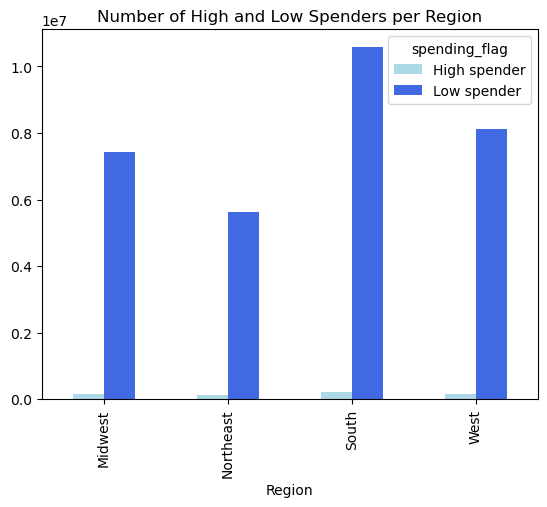

In [24]:
#Create a bar chart showing the number of high and low spenders in each region
bar_chart_regional_spending=regional_spending.plot.bar(color=['lightblue','royalblue'], title = 'Number of High and Low Spenders per Region')

[[Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')]]

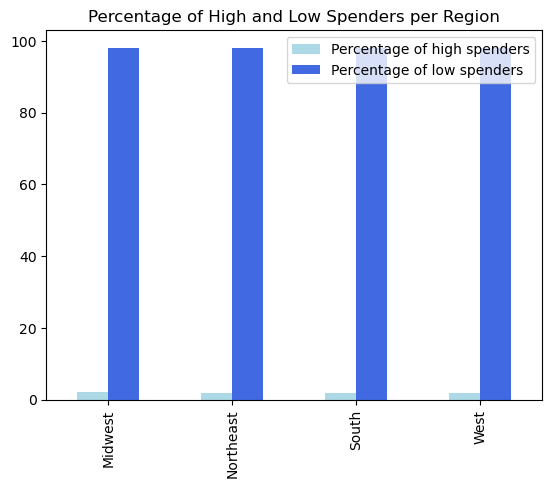

In [25]:
#Create a bar chart showing the percentage of high and low spenders in each region
bar_chart_regional_spending1=regional_spendings_percentages_1.plot.bar(color=['lightblue','royalblue'],title = 'Percentage of High and Low Spenders per Region')
bar_chart_regional_spending1.set(xticklabels=['Midwest', 'Northeast', 'South', 'West' ])

### Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [26]:
#Creating a column called "exclusion flag" to flag customers who made less than 5 orders.
ords_final.loc[ords_final['max_order'] >= 5, 'exclusion_flag'] = 'Keep'
ords_final.loc[ords_final['max_order'] < 5, 'exclusion_flag'] = 'Remove'

In [27]:
#Check that all each row has been assigned a flag.
ords_final['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep      30964564
Remove     1440295
Name: count, dtype: int64

In [28]:
#Check that the rows that have been assigned either a Keep or Remove exclusion flag still amount to 32404859
30964564 + 1440295

32404859

In [29]:
#Grouping data by unique user_id so as not to count a customer everytime they placce an order
ords_final.groupby(['exclusion_flag']).user_id.nunique()

exclusion_flag
Keep      162631
Remove     43578
Name: user_id, dtype: int64

In [30]:
#Checking that the flags have been assigned correctly
ords_final[['user_id', 'exclusion_flag', 'order_number','max_order']].tail(60)

,user_id,exclusion_flag,order_number,max_order
32404799,11534,Keep,2,12
32404800,11534,Keep,3,12
32404801,11534,Keep,4,12
32404802,11534,Keep,5,12
32404803,11534,Keep,6,12
32404804,11534,Keep,7,12
32404805,11534,Keep,8,12
32404806,11534,Keep,9,12
32404807,11534,Keep,10,12
32404808,11534,Keep,11,12


In [31]:
#Creating a subset with the low-activity customers to be excluded from the data set
subset_to_exclude = ords_final[ords_final['exclusion_flag'] == 'Remove']

In [32]:
#Checking the shape of the subset
subset_to_exclude.shape

(1440295, 32)

In [33]:
#Creating a new data frame excluding the low-activity
ords_without_low_activity_customers = ords_final[ords_final['exclusion_flag'] == 'Keep']

In [34]:
#Checking the shape of the subset
ords_without_low_activity_customers.shape

(30964564, 32)

In [35]:
#Check that the rows from the subset_to_exclude added to the rows of the ords_without_low_activity_customers subset equl to 32404859
1440295 + 30964564

32404859

In [36]:
ords_without_low_activity_customers.shape

(30964564, 32)

# 3. Export Data

In [ ]:
#Export the subset as a pickle file
subset_to_exclude.to_pickle(os.path.join(path, '02 Data','Prepared Data','ords_to_exclude.pkl'))

In [44]:
#Export the subset as a pickle file
ords_without_low_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data','ords_without_low_activity_customers.pkl'))